In [12]:
!pip install -q -U google-generativeai

In [122]:
import sys
sys.version

'3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]'

In [11]:
!python -m pip install --upgrade pip

  Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [124]:
API_KEY = ""


import google.generativeai as genai

In [128]:
import pathlib
import textwrap
import pickle
import google.generativeai as genai

# Used to securely store your API key
# from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


In [130]:
# # Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=API_KEY)

In [131]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


# Text generation

In [135]:
gen_model = genai.GenerativeModel('gemini-pro')

In [136]:
gen_model

 genai.GenerativeModel(
   model_name='models/gemini-pro',
   generation_config={}.
   safety_settings={}
)

In [137]:
response = gen_model.generate_content("What is the meaning of life?")

In [138]:
response

In [139]:
to_markdown(response.text)

> The meaning of life is a philosophical question that has been asked for centuries. There is no one definitive answer to this question, as the meaning of life is different for each individual. Some common themes that have been suggested as the meaning of life include:
> 
> * To find happiness and fulfillment.
> * To make a difference in the world.
> * To connect with others and build relationships.
> * To learn and grow as a person.
> * To find purpose and meaning in one's work.
> * To appreciate the beauty and wonder of the world.
> * To live a life of integrity and authenticity.
> 
> Ultimately, the meaning of life is something that each individual must discover for themselves. There is no right or wrong answer, and the meaning of life can change over time.
> 
> Here are some additional perspectives on the meaning of life:
> 
> * **The existentialist perspective:** Existentialists believe that there is no inherent meaning to life, and that each individual must create their own meaning. This can be done through making choices, taking action, and living a life of authenticity.
> * **The religious perspective:** Many religions believe that the meaning of life is to live in accordance with God's will. This can involve following religious teachings, practicing certain rituals, and striving to live a righteous life.
> * **The humanist perspective:** Humanists believe that the meaning of life is to live a life that is fulfilling and meaningful to the individual. This can involve pursuing one's own interests, making a difference in the world, and living a life of compassion and empathy.
> 
> No matter what one's perspective on the meaning of life is, it is important to remember that the journey is just as important as the destination. The meaning of life is not something that can be achieved overnight, but rather something that is discovered through living a full and meaningful life.

In [140]:
response = gen_model.generate_content("What is the net worth of google?")

In [141]:
to_markdown(response.text)

> As of August 2023, Google's parent company, Alphabet Inc., has a market capitalization of approximately $1.2 trillion, making it one of the most valuable companies in the world. The net worth of Google is typically not reported as a separate entity from Alphabet, as the two are legally and financially intertwined. However, estimates of Google's individual net worth vary, and can range from several hundred billion to over a trillion dollars.

In [142]:
response = gen_model.generate_content("Who won the cricket worldcup 2023")
to_markdown(response.text)

> I do not have access to real-time information and my knowledge cutoff is April 2023. Therefore, I cannot answer this question as the Cricket World Cup 2023 has not taken place yet. I recommend checking the official website of the International Cricket Council (ICC) or a reputable news source for the most up-to-date information on the tournament.

In [58]:
response = model.generate_content("when the diwali festival will be celeberate in india 2023")
to_markdown(response.text)

> Diwali, also known as Deepawali, is a festival of lights celebrated by Hindus, Sikhs, and Jains across the world. In India, Diwali is typically celebrated over a period of five days, with the main day of the festival falling on the third day. 
> 
> In 2023, Diwali will be celebrated in India on **Sunday, November 12**.

In [143]:
response.candidates

[index: 0
content {
  parts {
    text: "I do not have access to real-time information and my knowledge cutoff is April 2023. Therefore, I cannot answer this question as the Cricket World Cup 2023 has not taken place yet. I recommend checking the official website of the International Cricket Council (ICC) or a reputable news source for the most up-to-date information on the tournament."
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [64]:
response = gen_model.generate_content("What is the meaning of life?", stream=True)

In [66]:
to_markdown(response.text)

> The meaning of life is a deeply personal and philosophical question that has been pondered by humans for millennia. There is no single answer that is universally agreed upon, as the meaning of life is subjective and can vary greatly from one individual to another. Some common themes that emerge when discussing the meaning of life include:
> 
> - **Finding purpose and fulfillment:** Many people find meaning in their life by pursuing goals, achieving milestones, and making a positive contribution to the world. This can include pursuing a career, raising a family, engaging in creative endeavors, or making a difference in the community.
> 
> - **Experiencing joy and happiness:** Some people find meaning in life by simply enjoying the present moment and seeking out experiences that bring them joy and satisfaction. This can include spending time with loved ones, traveling, pursuing hobbies, or engaging in activities that bring a sense of fulfillment.
> 
> - **Seeking knowledge and understanding:** Others find meaning in life through the pursuit of knowledge and understanding. This can involve studying different subjects, exploring new ideas, or seeking out experiences that broaden their perspective and help them better understand the world around them.
> 
> - **Creating a legacy:** Some people find meaning in life by leaving a lasting legacy after they are gone. This can include creating works of art, raising a family, making a significant contribution to society, or leaving a positive impact on the world in some way.
> 
> - **Connecting with others:** Many people find meaning in life through their connections with others. This can include building strong relationships with family and friends, forming a sense of community, or engaging in acts of kindness and compassion towards others.
> 
> Ultimately, the meaning of life is something that each individual must discover for themselves. There is no right or wrong answer, and the meaning of life can change over time as a person's experiences and perspectives evolve.

In [67]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a deeply personal and philosophical question that has been pondered by
________________________________________________________________________________
 humans for millennia. There is no single answer that is universally agreed upon, as the meaning of life is subjective and can vary greatly from one individual to another.
________________________________________________________________________________
 Some common themes that emerge when discussing the meaning of life include:

- **Finding purpose and fulfillment:** Many people find meaning in their life by pursuing goals, achieving milestones, and making a positive contribution to the world. This can include pursuing a career, raising a family, engaging in creative endeavors, or making a difference
________________________________________________________________________________
 in the community.

- **Experiencing joy and happiness:** Some people find meaning in life by simply enjoying the present moment and see

In [148]:
# pickle.dump(gen_model,open(r'D:\projects\palm\gen_model.pkl','wb'))

In [149]:
# with open('gen_model.pkl', 'wb') as file:
#     pickle.dump(gen_model, file)

# image to text

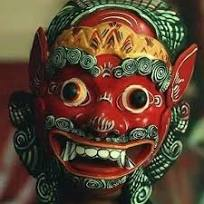

In [19]:
import PIL.Image

img = PIL.Image.open(r'C:\Users\hp\OneDrive\Pictures\Screenshots\asura.jpg')
img

In [20]:
model = genai.GenerativeModel('gemini-pro-vision')

In [21]:
response = model.generate_content(img)

to_markdown(response.text)

>  This is a traditional Balinese mask.

In [22]:
response = model.generate_content(["Write a short, engaging blog post based on this picture", img], stream=True)
response.resolve()

In [23]:
to_markdown(response.text)

>  **The Barong: A Balinese Spirit Mask**
> 
> The Barong is a benevolent spirit mask used in traditional Balinese dance and drama performances. It is one of the most important and well-known masks in Balinese culture, and is often used to represent the forces of good in the eternal battle between good and evil.
> 
> The Barong is typically made of wood or leather, and is often painted in bright colors. It has a large, gaping mouth with sharp teeth, and its eyes are usually made of glass or metal. The mask is often decorated with intricate carvings and gold leaf.
> 
> The Barong is believed to be the guardian of the Balinese people, and is often invoked to protect them from evil spirits. It is also used in rituals to promote fertility and good harvests.
> 
> When the Barong is danced, it is usually accompanied by a group of musicians playing traditional Balinese instruments. The dance is often very lively and energetic, and the Barong is often seen leaping and spinning around the stage.
> 
> The Barong is a powerful and important symbol in Balinese culture, and it is a reminder of the importance of good over evil.

# Chat conversations

In [88]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [89]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer uses electricity to do math really fast and show us the answers on a screen.

In [90]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer uses electricity to do math really fast and show us the answers on a screen."
 }
 role: "model"]

In [96]:
# response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)
# to_markdown(response.text)

In [97]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is an electronic device that receives input, processes data, stores data,
________________________________________________________________________________
 and outputs information. The input can come from a variety of sources, such as a keyboard, mouse, or microphone. The data is then processed by the computer
________________________________________________________________________________
's central processing unit (CPU), which performs calculations and logical operations. The results of the processing are stored in the computer's memory, and can be retrieved and displayed on a screen or printed on paper.

Here's a simplified analogy: Imagine a computer as a chef in a kitchen. The input is
________________________________________________________________________________
 the ingredients, the CPU is the chef, the memory is the pantry, and the output is the cooked meal. The chef (CPU) follows a recipe (program) to combine the ingredients (data) in the pantry (memory) to create

In [98]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer uses electricity to do math really fast and show us the answers on a screen.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is an electronic device that receives input, processes data, stores data, and outputs information. The input can come from a variety of sources, such as a keyboard, mouse, or microphone. The data is then processed by the computer's central processing unit (CPU), which performs calculations and logical operations. The results of the processing are stored in the computer's memory, and can be retrieved and displayed on a screen or printed on paper.
> 
> Here's a simplified analogy: Imagine a computer as a chef in a kitchen. The input is the ingredients, the CPU is the chef, the memory is the pantry, and the output is the cooked meal. The chef (CPU) follows a recipe (program) to combine the ingredients (data) in the pantry (memory) to create a dish (output).
> 
> Computers are used in a wide variety of applications, including word processing, spreadsheets, presentations, games, graphic design, music production, video editing, and web browsing. They are also used to control industrial machinery, medical equipment, and transportation systems.

# embeddings

In [99]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')
len(result)

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


1

In [100]:
result['embedding']
# result.get('embedding')

[-0.003216741,
 -0.013358698,
 -0.017649598,
 -0.009181086,
 0.03926703,
 0.00038724372,
 0.04898349,
 -0.0023305446,
 -0.020243652,
 0.012394654,
 -0.015487696,
 0.007854712,
 -0.0036892202,
 -0.03875109,
 -0.014143618,
 -0.03157482,
 0.043664,
 -0.012639754,
 -0.013856963,
 -0.035368867,
 -0.02083169,
 -0.02772484,
 0.022817137,
 0.014411988,
 -0.010126491,
 -0.025422357,
 0.03446101,
 -0.049600348,
 -0.007758251,
 0.032162495,
 -0.031210061,
 0.018713735,
 -0.06506596,
 -0.014446418,
 0.037912805,
 -0.047814418,
 0.017829161,
 -0.030598102,
 -0.080040686,
 0.014093507,
 0.044828024,
 -0.03998069,
 -0.037098397,
 -0.036323722,
 0.015360416,
 0.015400565,
 -0.02089156,
 0.05555013,
 0.02301401,
 -0.11904545,
 0.019397752,
 0.024494164,
 0.10974229,
 -0.021818588,
 -0.024052579,
 -0.026254693,
 0.048247337,
 0.0047094426,
 -0.012893013,
 -0.012916471,
 0.007871746,
 -0.020871392,
 -0.000119492506,
 0.042224966,
 -0.0055988817,
 -0.03899682,
 -0.0028476096,
 0.037036117,
 0.04640705,
 -

In [101]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')


[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


In [102]:
response.candidates[0].content

parts {
  text: "A computer is an electronic device that receives input, processes data, stores data, and outputs information. The input can come from a variety of sources, such as a keyboard, mouse, or microphone. The data is then processed by the computer\'s central processing unit (CPU), which performs calculations and logical operations. The results of the processing are stored in the computer\'s memory, and can be retrieved and displayed on a screen or printed on paper.\n\nHere\'s a simplified analogy: Imagine a computer as a chef in a kitchen. The input is the ingredients, the CPU is the chef, the memory is the pantry, and the output is the cooked meal. The chef (CPU) follows a recipe (program) to combine the ingredients (data) in the pantry (memory) to create a dish (output).\n\nComputers are used in a wide variety of applications, including word processing, spreadsheets, presentations, games, graphic design, music production, video editing, and web browsing. They are also used 

In [103]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')


[-0.008884882, -0.039092645, 0.015406522, 0.031088 ... TRIMMED ...


In [105]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer uses electricity to do math really fast and show us the answers on a screen."
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer is an electronic device that receives input, processes data, stores data, and outputs information. The input can come from a variety of sources, such as a keyboard, mouse, or microphone. The data is then processed by the computer\'s central processing unit (CPU), which performs calculations and logical operations. The results of the processing are stored in the computer\'s memory, and can be retrieved and displayed on a screen or printed on paper.\n\nHere\'s a simplified analogy: Imagine a computer as a chef in a kitchen. The input is the ingredients, the CPU is the chef, the memory is the pantry, and the output is the cooked meal.

In [106]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')


[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.04727741, -0.0303997, 0.01194012, 0.021566141, ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.008884882, -0.039092645, 0.015406522, 0.031088 ... TRIMMED...


In [112]:
len(result['embedding'][-1])

768

In [113]:
len(result['embedding'][-0])

768

Advanced use cases

In [114]:
response = model.generate_content('[Questionable prompt here]')
response.candidates

[index: 0
content {
  parts {
    text: "I am sorry, I am not supposed to generate responses that are sexually suggestive in nature. Would you like me to try generating something different?"
  }
  role: "model"
}
finish_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: HIGH
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [115]:
response.prompt_feedback


safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [116]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"I'm sorry, I don't understand your question. Can you please rephrase it?"

In [121]:
#argsort usecase
import numpy as np

arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3])

# Get the indices that would sort the array
sorted_indices = np.argsort(arr)

print(sorted_indices)


[1 3 6 0 9 2 4 8 7 5]


In [117]:
import google.ai.generativelanguage as glm

In [118]:
r'C:\Users\hp\OneDrive\Pictures\Screenshots\asura.jpg'

'C:\\Users\\hp\\OneDrive\\Pictures\\Screenshots\\asura.jpg'

In [119]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path(r'C:\Users\hp\OneDrive\Pictures\Screenshots\asura.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)


In [120]:
response.resolve()

# to_markdown(response.text[:100] + "... [TRIMMED] ...")
to_markdown(response.text)

>  **The Barong: A Balinese Spirit Mask**
> 
> The Barong is a benevolent spirit mask used in Balinese dance-dramas. It is typically made of wood and painted with bright colors. The Barong has a long, snout-like mouth and a pair of tusks. It is often worn by a dancer who performs a series of acrobatic movements.
> 
> The Barong is said to represent the power of good, and it is often used to ward off evil spirits. It is also a popular tourist attraction, and many visitors to Bali enjoy taking pictures with the Barong.
> 
> If you're ever in Bali, be sure to check out a Barong performance. It's a truly unique and unforgettable experience.

# multi turn chat

In [101]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)


> 1. **Input:** You use a keyboard, mouse, or touch screen to tell the computer what to do.
> 2. **Processing:** The computer's brain, called the CPU, figures out what you want it to do.
> 3. **Memory:** The computer stores information in its memory, like a big notebook.
> 4. **Output:** The computer shows you what it's done on a screen or printer.

In [102]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)


> 1. **Input:** When you type on a keyboard, click a mouse, or tap a touchscreen, you are sending input to the computer. Input devices translate these actions into electrical signals that the computer can understand.
> 2. **Processing:** The computer's central processing unit (CPU) is responsible for processing input and performing calculations. The CPU is made up of billions of tiny transistors that can switch on and off very quickly. These transistors are used to perform logical operations, such as addition, subtraction, multiplication, and division.
> 3. **Memory:** The computer's memory stores data and instructions that are being processed by the CPU. Memory is divided into two main types: RAM (random access memory) and ROM (read-only memory). RAM is used to store data and instructions that are currently being processed, while ROM stores permanent data and instructions, such as the computer's operating system.
> 4. **Output:** Output devices, such as monitors, printers, and speakers, display or print the results of the computer's processing. Output devices convert electrical signals from the computer into human-readable or audible form.
> 5. **Storage:** The computer's storage devices, such as hard disk drives and solid-state drives, store data and instructions that are not currently being processed. Storage devices are much larger than memory, and they can store data permanently.
> 
> In addition to these five main components, computers also have a number of other important parts, such as a motherboard, power supply, and cooling system. These parts work together to ensure that the computer operates properly.
> 
> Here is a simple analogy to help explain how a computer works:
> 
> * **Input:** Imagine a chef taking orders from customers in a restaurant.
> * **Processing:** The chef cooks the food according to the orders.
> * **Memory:** The chef keeps track of the orders and the status of each dish.
> * **Output:** The chef serves the food to the customers.
> * **Storage:** The chef stores the ingredients and cooking utensils in a pantry.
> 
> In this analogy, the input is the customer orders, the processing is the cooking, the memory is the chef's brain and the order tickets, the output is the food, and the storage is the pantry.

In [105]:
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=200,
        temperature=1.0)
)


In [106]:
to_markdown(response.text)

> Once upon a time, there was a little girl named Lily who was about to begin the first grade. Her parents took her shopping for school supplies and new clothes. Lily was e